<a href="https://colab.research.google.com/github/manishiitg/ML_Experiments/blob/master/autoencoder/pytorch_basic_experiment_autoencoder_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder in pytorch

just trying to simple FF autoencoder using pytorch

In [3]:
import torch
import torch.nn as nn
import torchvision  
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



cuda


In [0]:
Simple Encoder/Decoder Network

In [0]:
class AutoEncoderNN(nn.Module):
    def __init__(self, input_size = 784, encoding_dim = 10):
        super(AutoEncoderNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, 2000),
            nn.ReLU(),
            nn.Linear(2000, encoding_dim),
            nn.ReLU()
        )   

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 2000),
            nn.ReLU(),
            nn.Linear(2000, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, input_size),
            nn.Tanh()
        )

    
    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out

    def encode(self, x):
      return self.encoder(x)

    def decode(self, x):
      return self.decoder(x)

model = AutoEncoderNN().to(device)



MNIST Dataset

In [5]:

# Hyper-parameters 
batch_size = 250

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True,
                                           transform=transform,  
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transform)

combine_dataset = torch.utils.data.ConcatDataset([train_dataset, test_dataset])


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=20, 
                                          shuffle=False)

combin_dataloader = torch.utils.data.DataLoader(dataset=combine_dataset, batch_size=batch_size, 
                                          shuffle=False)


print(len(combine_dataset))

print(len(combine_dataset)/batch_size)

print(combine_dataset[0][0].shape)

# # for epoch in range(1):
# for i, (images, labels) in enumerate(combin_dataloader):  
#     # Move tensors to the configured device
#     images = images.reshape(-1, 28*28)
#     labels = labels

#     print(images.data.numpy())

#     if i > 1:
#       break


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 28048425.68it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


32768it [00:00, 448051.67it/s]
  1%|          | 16384/1648877 [00:00<00:11, 145431.58it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


1654784it [00:00, 7180800.29it/s]                            
8192it [00:00, 184386.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!
70000
280.0
torch.Size([1, 28, 28])


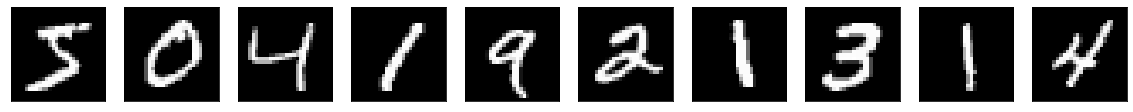

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(combine_dataset[i][0].numpy().squeeze())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Training the network

In [7]:
# Train the model
total_step = len(combin_dataloader)
num_epochs = 10

learning_rate = .0005

# Loss and optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=.9)
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

criterion = nn.MSELoss() 

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(combin_dataloader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [100/280], Loss: 0.2194
Epoch [1/10], Step [200/280], Loss: 0.2086
Epoch [2/10], Step [100/280], Loss: 0.1684
Epoch [2/10], Step [200/280], Loss: 0.1676
Epoch [3/10], Step [100/280], Loss: 0.1350
Epoch [3/10], Step [200/280], Loss: 0.1479
Epoch [4/10], Step [100/280], Loss: 0.1231
Epoch [4/10], Step [200/280], Loss: 0.1379
Epoch [5/10], Step [100/280], Loss: 0.1160
Epoch [5/10], Step [200/280], Loss: 0.1307
Epoch [6/10], Step [100/280], Loss: 0.1104
Epoch [6/10], Step [200/280], Loss: 0.1268
Epoch [7/10], Step [100/280], Loss: 0.1076
Epoch [7/10], Step [200/280], Loss: 0.1236
Epoch [8/10], Step [100/280], Loss: 0.1046
Epoch [8/10], Step [200/280], Loss: 0.1219
Epoch [9/10], Step [100/280], Loss: 0.1028
Epoch [9/10], Step [200/280], Loss: 0.1194
Epoch [10/10], Step [100/280], Loss: 0.1010
Epoch [10/10], Step [200/280], Loss: 0.1182


In [0]:
import os.path
if os.path.isfile('basic_autoencoer_pytorch_25_epoch.json'):
  model.load_state_dict(torch.load("basic_autoencoer_pytorch_25_epoch.json"))
  model.eval()
else:
  torch.save(model.state_dict(), "basic_autoencoer_pytorch_25_epoch.json")

Comparing encoded images with original images

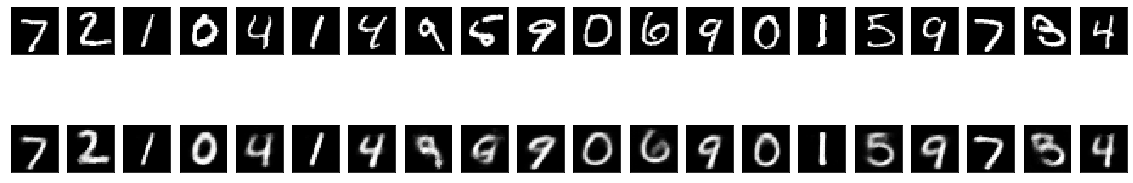

In [10]:
with torch.no_grad():
  for i, (images, labels) in enumerate(test_loader):  
    images = images.reshape(-1, 28*28).to(device)
    outputs = model(images)

    
    n = len(images)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28,28).cpu().data.numpy())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(outputs[i].reshape(28, 28).cpu().data.numpy())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    break



In [11]:
encoded_data = None
Y = None
with torch.no_grad():
  for i, (images, labels) in enumerate(combin_dataloader):  
    images = images.reshape(-1, 28*28).to(device)
    outputs = model.encode(images)
    if encoded_data is None:
      encoded_data = outputs.cpu().data.numpy()
      Y = labels
    else:
      encoded_data = np.append(encoded_data, outputs.cpu().data.numpy(), axis = 0)
      Y = np.append(Y, labels)

    # if i > 10:
    #   break


print(encoded_data.shape)



(70000, 10)


In [0]:
def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

Clustering of Data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


kmean accuracy  0.45015714285714287
(10, 10)


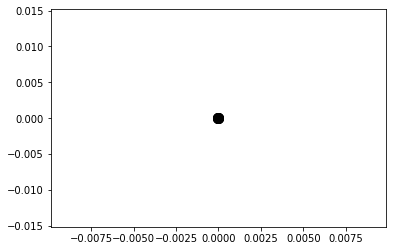

In [18]:
from sklearn.cluster import KMeans
X = encoded_data
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
Y_pred = kmeans.predict(X)

print("kmean accuracy " ,  acc(Y, Y_pred))

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

print(centers.shape)


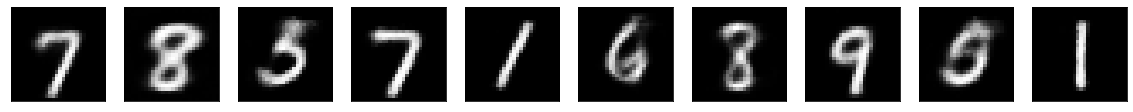

In [16]:
n = len(centers)

outputs = model.decode(torch.from_numpy(centers).to(device))
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    
    plt.imshow(outputs[i].reshape(28, 28).cpu().data.numpy())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


Accuracy is very low for clustering. This is was just an experiment, for images its better to go with CNN